<a href="https://colab.research.google.com/github/mariaeuge27/proyecto-integrador-2/blob/main/Educaci%C3%B3n_Argentinna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# prompt: amar una dataframe de al menos 100 filas con datos random con apellido y nombre. nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er trimestre, nota d 2dotrimestre, nota 3er trimestre, faltas a clases.

import pandas as pd
import numpy as np
import random

# Lista de materias escolares de nivel secundario en Argentina
materias = [
    "Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales",
    "Educación Física", "Inglés", "Física", "Química", "Biología", "Filosofía", "Sociología",
    "Arte", "Música", "Informática"
]

# Función para generar un nombre aleatorio
def generar_nombre():
  nombres = ["Juan", "Pedro", "Maria", "Ana", "Luis", "Carla", "Diego", "Sofia", "Martin", "Laura"]
  apellidos = ["Gómez", "Rodríguez", "Fernández", "López", "García", "Martínez", "Pérez", "González", "Sánchez", "Romero"]
  return random.choice(nombres), random.choice(apellidos)

# Crear una lista para almacenar los datos del DataFrame
data = []

for i in range(100):
  nombre, apellido = generar_nombre()
  nro_dni = np.random.randint(10000000, 99999999)
  materia = random.choice(materias)
  nota_1er_trimestre = np.random.randint(1, 11)
  nota_2do_trimestre = np.random.randint(1, 11)
  nota_3er_trimestre = np.random.randint(1, 11)
  faltas_a_clases = np.random.randint(0, 20)
  data.append([nombre, apellido, nro_dni, materia, nota_1er_trimestre, nota_2do_trimestre, nota_3er_trimestre, faltas_a_clases])

# Crear el DataFrame
df = pd.DataFrame(data, columns=["Nombre", "Apellido", "Nro_DNI", "Materia Escolar", "Nota 1er Trimestre", "Nota 2do Trimestre", "Nota 3er Trimestre", "Faltas a Clases"])

# Mostrar las primeras filas del DataFrame
print(df.head())

  Nombre   Apellido   Nro_DNI     Materia Escolar  Nota 1er Trimestre  \
0    Ana  Fernández  45965601              Física                   7   
1  Laura     Romero  11008227                Arte                   4   
2  Laura   González  53687591            Biología                   3   
3  Pedro  Fernández  78829472  Ciencias Naturales                   5   
4  Maria      Pérez  83421025         Informática                  10   

   Nota 2do Trimestre  Nota 3er Trimestre  Faltas a Clases  
0                   9                   8                9  
1                   9                   6                8  
2                   6                  10               18  
3                   1                   9                1  
4                   6                   7               12  


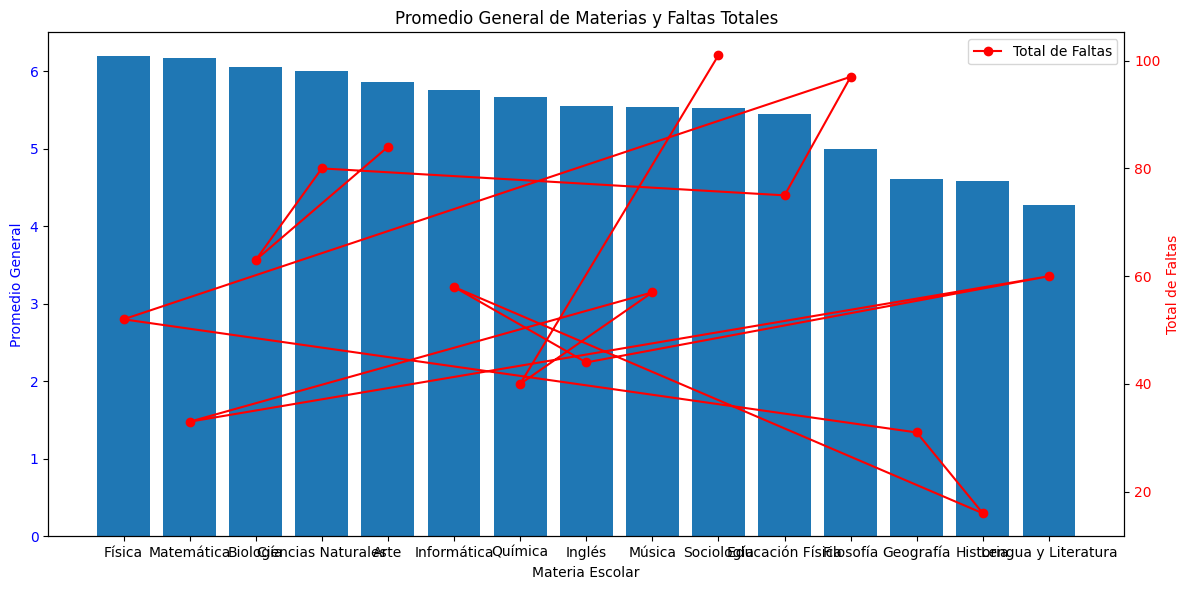

In [4]:
# prompt: armar grafico de barras con promedio general de cada materia, ordenado de mayor a menor, agregar las faltas como valor constrastable en dos ejes. agregar las leyendas que ayuden a la interpretacion.

import pandas as pd
import matplotlib.pyplot as plt

# Calcular el promedio general de cada materia
promedio_por_materia = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Ordenar las materias de mayor a menor promedio
promedio_por_materia_ordenado = promedio_por_materia.sort_values(ascending=False)

# Calcular el total de faltas por materia
faltas_por_materia = df.groupby('Materia Escolar')['Faltas a Clases'].sum()

# Crear la figura y los ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear el gráfico de barras para el promedio general de cada materia
ax1.bar(promedio_por_materia_ordenado.index, promedio_por_materia_ordenado.values)
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Promedio General de Materias y Faltas Totales')

# Crear el eje secundario para las faltas
ax2 = ax1.twinx()
ax2.plot(faltas_por_materia.index, faltas_por_materia.values, color='red', marker='o')
ax2.set_ylabel('Total de Faltas', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Rotar las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend(['Total de Faltas', 'Promedio General'], loc='upper right')

# Ajustar el espaciado entre las barras
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [6]:
df.to_csv("datos_alumnos.csv",index=False)